In [113]:
from random import randint

import geopandas
import fiona
import osmnx as ox
import networkx as nx
import plotly
import shapely
from shapely import Point, buffer

In [114]:
import sklearn

In [115]:
import taxicab as tx
import matplotlib.pyplot as plt
import math

Person: Mary, Joe with email: maryjoe@outlook.com with id 48
Person: Moises, Herrera with email: moiseshe@outlook.com with id 17
POINT (29.18078 -82.12779)
POLYGON ((31.176038 -82.119348, 29.176038 -84.119348, 27.176038 -82.119348, 29.176038 -80.119348, 31.176038 -82.119348))
Person: Mary, Joe with email: maryjoe@outlook.com with id 48
Meeting Requested
Accepted
(29.176038, -82.119348)
(29.18078, -82.12779)
MultiDiGraph with 4375 nodes and 12930 edges


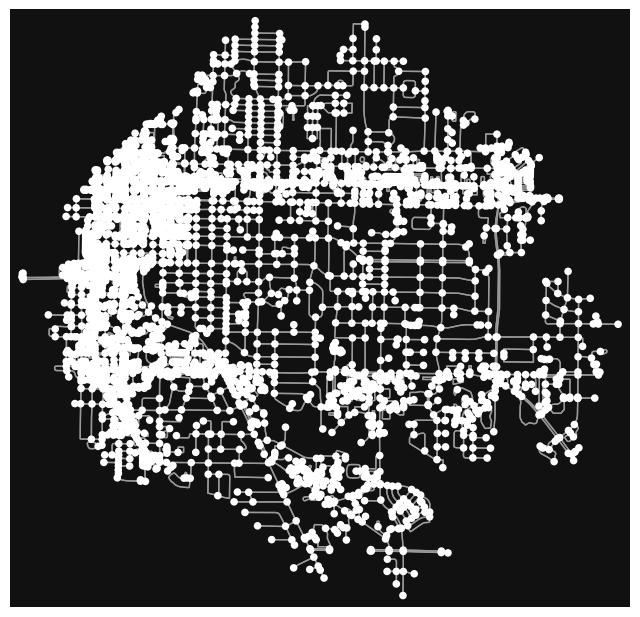

In [116]:
# 1  Create Profile ***Demonstration*** Short code snipper demonstrating that a user can be created with attributes,
# instantiated without location field ***Final Implementation*** Real deployment will use spring boot framework for
# functional app, create User table on database, seed table, and have constraints for input


class User:
    location = Point()

    def __init__(self, username, email, firstname, lastname, password, id, location=None):
        self.username = username
        self.email = email
        self.firstname = firstname
        self.lastname = lastname
        self.password = password
        self.id = id

    def requestMeet(self):
        message = "Meeting Requested"
        return message

    def respondAffirmative(self):
        message = "Accepted"
        return message

    def respondNegative(self):
        message = "Denired"
        return message

    def __str__(self):
        return f'Person: {self.firstname}, {self.lastname} with email: {self.email} with id {self.id}'


def sign_in():
    print("You're signed in!")


class Services:

    def create_profile(self, username, email, firstname, lastname, password):
        newProfile = User(username, email, firstname, lastname, password, randint(1, 100))
        return newProfile


newServices = Services()
maryProfile = newServices.create_profile("maryjoe", "maryjoe@outlook.com", "Mary", "Joe", "happy123")
moisesProfile = newServices.create_profile("moisesh", "moiseshe@outlook.com", "Moises", "Herrera", "glad123")
dummyProfile = newServices.create_profile("dummy", "dummy@outlook.com", "Dummy", "Dummy", "dummy123")

# Run these functions to demonstrate users have been created
print(maryProfile)
print(moisesProfile)
# Person: Mary, Joe with email: maryjoe@outlook.com with id 91
# Person: Moises, Herrera with email: moiseshe@outlook.com with id 78


# 2 Acquire Location 2 Demonstration - The location will be added as an attribute to user object 2 Final
# Implementation - The location will be stored in the User table in the Postgresql database, using a Geography
# datatype for PostGIS, Spatial Index computed


# NOTE - For the demonstration, location will be manually filled! In final implementation, it will be acquired for
# the Web Page Document Object Model, Developer Tools using Google Chrome, then Console, displayed in the Visual
# Component of Data Exploration Assignment

maryProfile.location = Point(29.18078, -82.12779)
moisesProfile.location = Point(29.176038, -82.119348)

print(maryProfile.location)

## RESULT OF PRINT - POINT (29.18078 -82.12779)
## This is a Geometry Data Type

# 3 Stale Position - At this stage the User can either decide to Request a Meeting, or Respond to a Request. The
# application will have various possible decisions for this application, many decisions. However, not that many,
# at this point we can say there are five decision paths. This is showcased in the ALGORITHM DECISION TREE. However,
# for the sake of demonstration, this script is completely linear and will only show one of those decision paths.


# 4 Split - Request Path
# This demonstration depicts the algorithm flow for a user who is requesting to meet with other users who are nearby
# There are other algorithmic decision paths for users who choose to wait for a meeting and those
# will be discussed at a later date


# 4 List of nearby users
# Demonstration - Will manually place users in a list, the dummy variable is to show that not all users
# will lie in the Users Search Area, only those in the specified search radius will be place in a User List
# The User List is created because it is the potential meeting partners.

# Lets begin by creating the list
# In final implementation, as soon as the profile is created, the user will go to the User table. These steps
# may feel separate now, but in a working application they are all interconnected. This is for demonstration only

list = [maryProfile, moisesProfile, dummyProfile]

# Create a buffer for the user, in this case we will use moisesProfile

moisesBuffer = buffer(moisesProfile.location, 2, quad_segs=1)
print(moisesBuffer)

# RESULT OF PRINT - POLYGON ((31.176038 -82.119348, 29.176038 -84.119348, 27.176038 -82.119348, 29.176038
# -80.119348, 31.176038 -82.119348)) THIS IS A BUFFER POLYGON


# We will create a User List by check which users are within moisesBuffer AND are not the moisesProfile itself

potentialPartners = []

# This loop will check which users in the User List are within moises Buffer and add them to the potential Partner list
for obj in list:
    if (obj.id != moisesProfile.id) and (obj.location.within(moisesBuffer)):
        potentialPartners.append(obj)

print(*potentialPartners)

# RESULT - Mary Profile only

# 5 Request a Meeting to Potential Partners
# This demonstration is very basic and only here to show the flow of the algorithm
# In Implementation an instant messaging service will need to be adopted to create the functionality

# Theoretical Moises Profile sends request

print(moisesProfile.requestMeet())

# RESULT - Meeting Requested


# 6 Receive Response - Affirmative or Negative - In this demonstration, the Affirmative path is displayed
# Theoretical MaryProfile send response

print(maryProfile.respondAffirmative())

# RESULT - Accepted


# 7 Produce Midpoint Meeting Point
# In demonstration this will show how a road network route is made between the two users location
# a midpoint is the calculated to receive a Point Geometry.
# In implementation, this will be displayed on the web application
# The result here is a Midpoint on the road network

lon = moisesProfile.location.x
lat = moisesProfile.location.y


moisesTupleLocation = (lon, lat)
print(moisesTupleLocation)

maryLon = maryProfile.location.x
maryLat = maryProfile.location.y

maryTupleLocation = (maryLon, maryLat)
print(maryTupleLocation)

ocala_graph = ox.graph_from_point(moisesTupleLocation, 3200, 'network', 'walk')
print(ocala_graph)
graph_projected = ox.project_graph(ocala_graph)
fig, ax = ox.plot_graph(graph_projected, node_size=30)

In [117]:
# For this algorithm we are using Graphs not locations so we must convert the location
# to nodes on a graph and then find the route between the two nodes along the edges of the graph
# Compute nearest node of Mary and Moises location utilizing unprojected graph
orig_node = ox.distance.nearest_nodes(ocala_graph, moisesTupleLocation[1], moisesTupleLocation[0])
print(orig_node)

# RESULT for Moises Location - Node 98881651 on Graph

dest_node = ox.distance.nearest_nodes(ocala_graph, maryTupleLocation[1], maryTupleLocation[0])
print(dest_node)

# RESULT for Mary Location - Node 7805362358 on Graph


98881651
7805362358


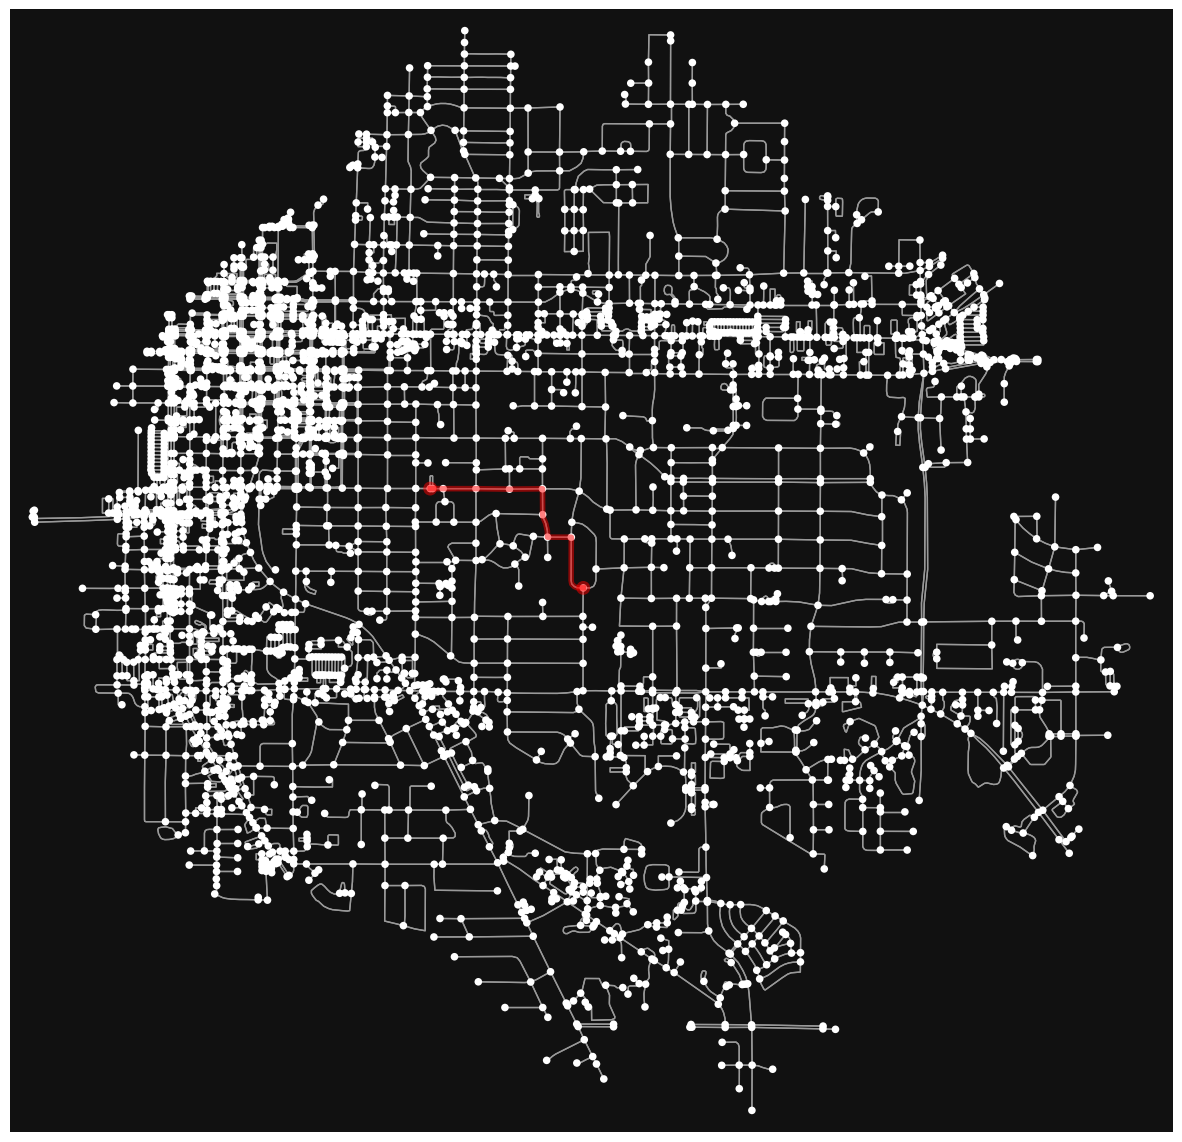

In [118]:
#Compute and display route from Moises to Mary utilizing unprojected graph, compute route using Network X Function
route = nx.shortest_path(ocala_graph, orig_node, dest_node)

fig, ax = ox.plot_graph_route(ocala_graph, route, node_size=30, figsize=(15,15))

In [119]:
# 8 Route to Meeting Point
# The meeting point is where the route will be lead to guide the users to meet
# Two will be produced in total, one for Moises, one for Mary, they will be private from each other
# This allows the application to retain user location privacy and anonymity for safety reason
# In implementation there will be timer to help facilitate quick automatic meet ups
# The result here is the line path(s) to the midpoint

# Now we will find the midpoint or rather the midnode within the route composed of nodes
midpoint_val = math.trunc(len(route)/2 - 1)
print(midpoint_val)

4


In [120]:
midpoint_node = route[midpoint_val]
print(midpoint_node)

98805268


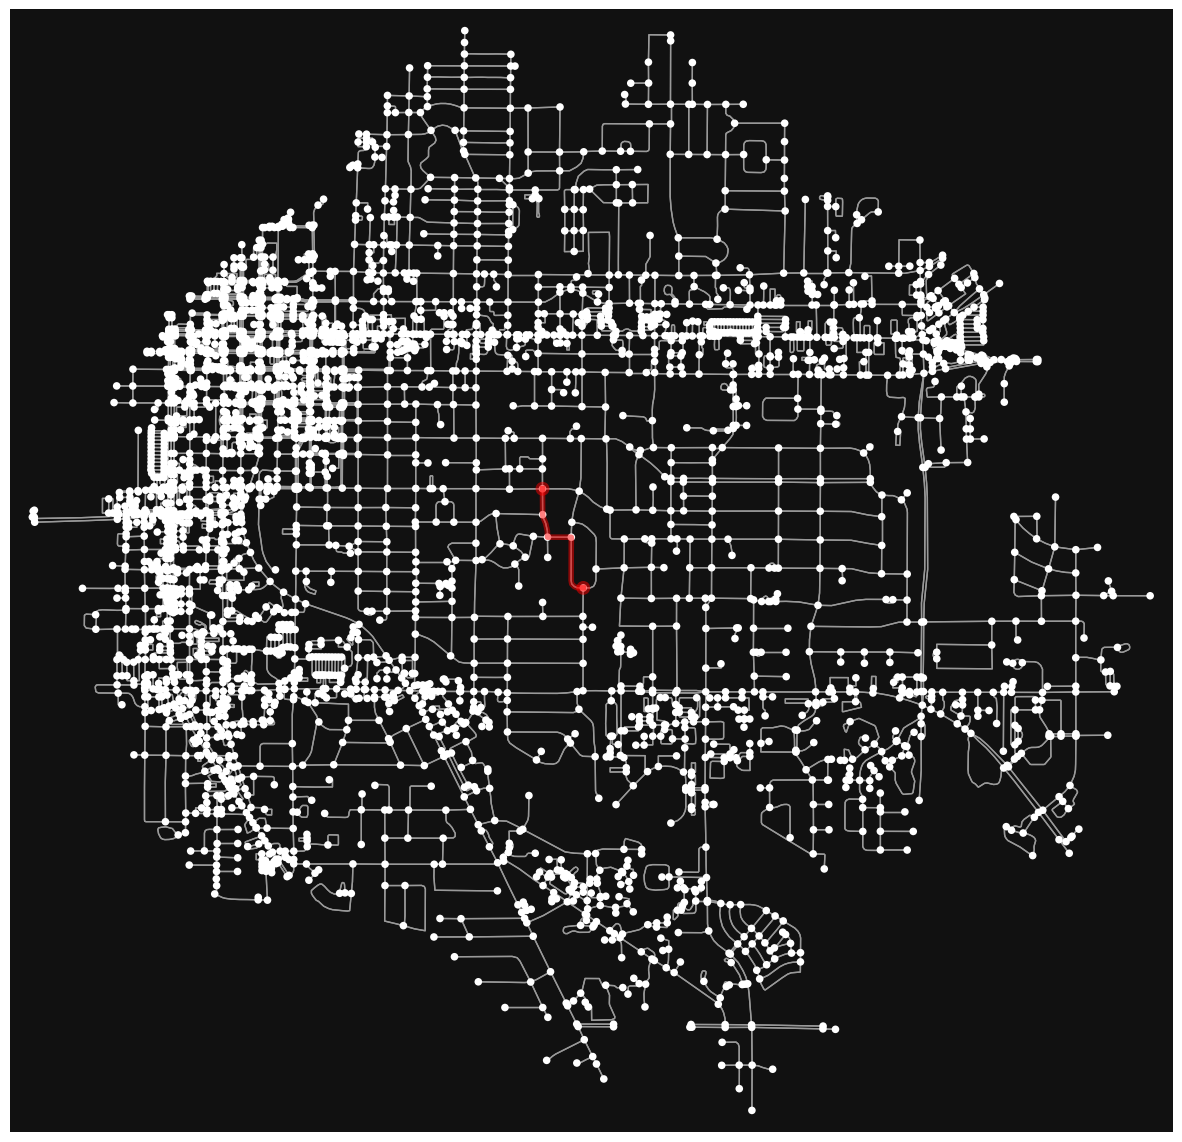

In [121]:
# We will establish the meeting path for Moises to Midpoint
# For our final two results we first have:
# 1. The Route from Moises Location to the Midway Meeting Point

meeting_route_moises = nx.shortest_path(ocala_graph, orig_node, midpoint_node)

fig, ax = ox.plot_graph_route(ocala_graph, meeting_route_moises, node_size=30, figsize=(15,15))

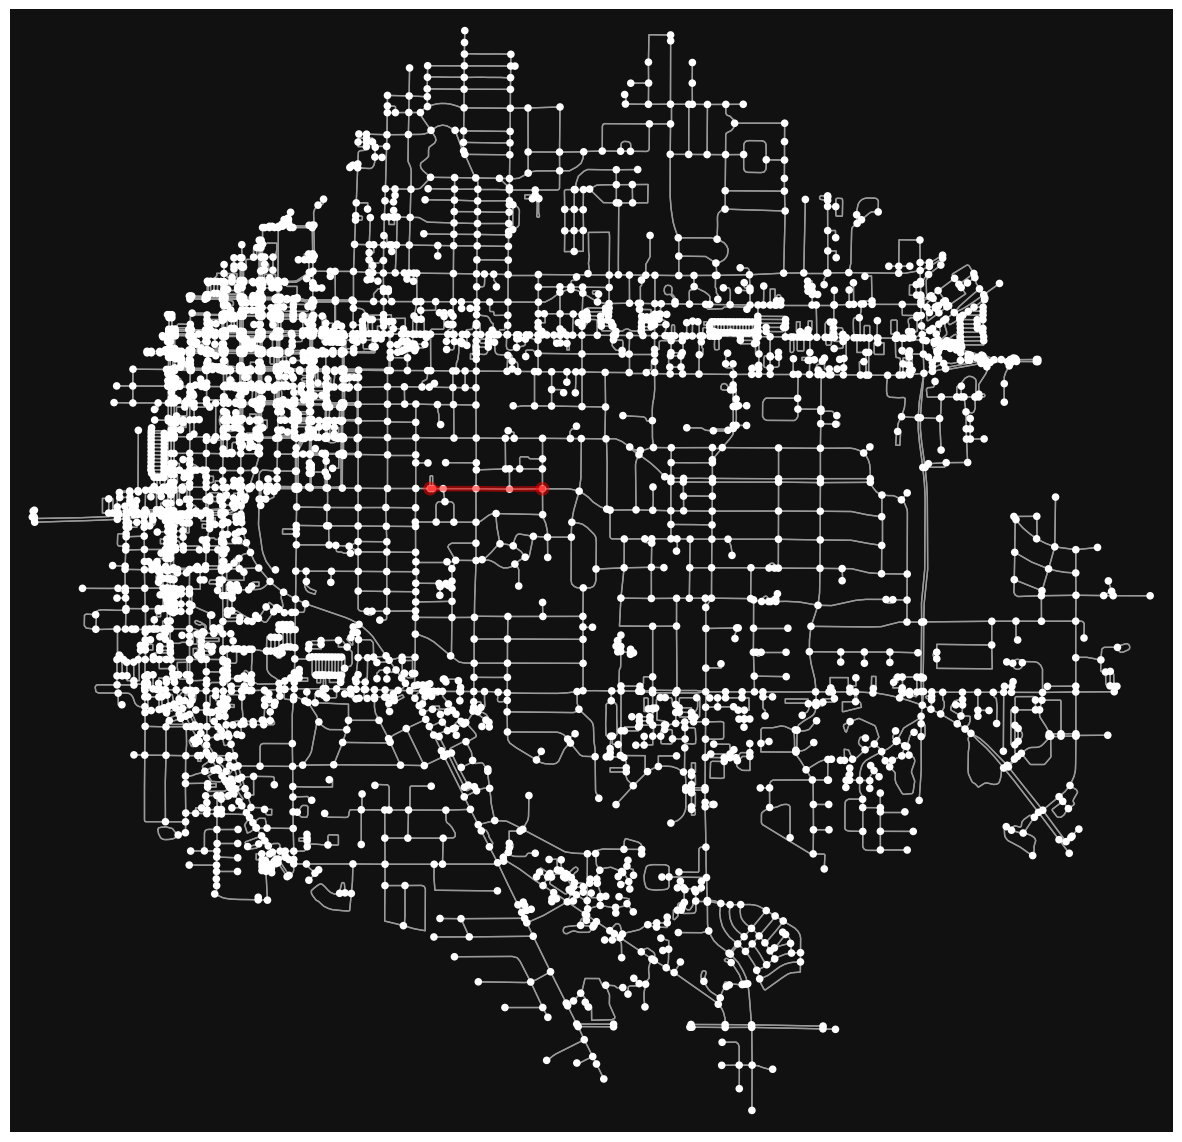

In [122]:
# 2. The Route from Mary Location to the Midway Point
meeting_route_mary = nx.shortest_path(ocala_graph, dest_node, midpoint_node)

fig, ax = ox.plot_graph_route(ocala_graph, meeting_route_mary, node_size=30, figsize=(15,15))

In [ ]:
# In an application context these paths will be produced seperately for each user and guide them to meet at the midpoint
# within a specific timeframe
# This concludes the demonstration